In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import seaborn as sns
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [5]:
city_day = pd.read_csv('city_day.csv')
try:
    city_day.drop(columns=['Unnamed: 0'], inplace=True)
except:
    pass
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
city_day.shape

(29531, 16)

In [7]:
city_day.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
city_day = city_day.copy(deep=True)

mice_imputer = IterativeImputer()
city_day['PM2.5'] = mice_imputer.fit_transform(city_day[['PM2.5']])
city_day['PM10'] = mice_imputer.fit_transform(city_day[['PM10']])
city_day['NO'] = mice_imputer.fit_transform(city_day[['NO']])
city_day['NOx'] = mice_imputer.fit_transform(city_day[['NOx']])
city_day['NH3'] = mice_imputer.fit_transform(city_day[['NH3']])
city_day['CO'] = mice_imputer.fit_transform(city_day[['CO']])
city_day['SO2'] = mice_imputer.fit_transform(city_day[['SO2']])
city_day['O3'] = mice_imputer.fit_transform(city_day[['O3']])
city_day['Benzene'] = mice_imputer.fit_transform(city_day[['Benzene']])
city_day['Toluene'] = mice_imputer.fit_transform(city_day[['Toluene']])
city_day['Xylene'] = mice_imputer.fit_transform(city_day[['Xylene']])
city_day['AQI'] = mice_imputer.fit_transform(city_day[['AQI']])
city_day['NO2'] = mice_imputer.fit_transform(city_day[['NO2']])

In [9]:
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=50) & (city_day['AQI'] >=0) ,'Good' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=100) & (city_day['AQI'] >=51) ,'Satisfactory' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=200) & (city_day['AQI'] >=101) ,'Moderate' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=300) & (city_day['AQI'] >=201) ,'Poor' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=400) & (city_day['AQI'] >=301) ,'Very Poor' , city_day['AQI_Bucket']
   )
city_day['AQI_Bucket'] = np.where(
   (city_day['AQI'] <=500) & (city_day['AQI'] >=401) ,'Severe' , city_day['AQI_Bucket']
   )
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [10]:
def mergeColumns(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['BTX'] = data['Benzene'] + data['Toluene'] + data['Xylene']
    data.drop(['Benzene','Toluene','Xylene'], axis=1)
    data['Particulate_Matter'] = data['PM2.5'] + data['PM10']
    return data

def subsetColumns(data):
    pollutants = ['Particulate_Matter', 'NO2', 'CO','SO2', 'O3', 'BTX']
    columns =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutants
    data = data[columns]
    return data, pollutants
def handleMissingValues(data):
   # missing_values = getMissingValues(data)
    newCityData = mergeColumns(data)
    newCityData, pollutants = subsetColumns(newCityData)
    return newCityData, pollutants

newCityData, newColumns = handleMissingValues(city_day)
newCityData
#print(newColumns)

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX
0,2015-01-01,Ahmedabad,166.463581,Moderate,185.577681,18.22,0.92,27.64,133.36,0.02000
1,2015-01-02,Ahmedabad,166.463581,Moderate,185.577681,15.69,0.97,24.55,34.06,12.95000
2,2015-01-03,Ahmedabad,166.463581,Moderate,185.577681,19.30,17.40,29.07,30.70,25.45000
3,2015-01-04,Ahmedabad,166.463581,Moderate,185.577681,18.48,1.70,18.59,36.08,15.57000
4,2015-01-05,Ahmedabad,166.463581,Moderate,185.577681,21.42,22.10,39.33,39.31,28.68000
...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.000000,Good,65.960000,25.06,0.47,8.55,23.30,15.04000
29527,2020-06-28,Visakhapatnam,70.000000,Satisfactory,98.470000,26.06,0.52,12.72,30.14,3.33000
29528,2020-06-29,Visakhapatnam,68.000000,Satisfactory,88.640000,29.53,0.48,8.42,30.96,0.02000
29529,2020-06-30,Visakhapatnam,54.000000,Satisfactory,66.610000,29.26,0.52,9.84,28.30,0.00000


In [11]:
min_Particulate_Matter = newCityData['Particulate_Matter'].min()
max_Particulate_Matter = newCityData['Particulate_Matter'].max()
newCityData['Particulate_Matter_new'] = [(x-min_Particulate_Matter)/(max_Particulate_Matter-min_Particulate_Matter)
                                         for x in newCityData['Particulate_Matter']]

min_NO2	= newCityData['NO2'].min()
max_NO2 = newCityData['NO2'].max()
newCityData['NO2_new'] = [(x-min_NO2)/(max_NO2-min_NO2) for x in newCityData['NO2']]

min_CO= newCityData['CO'].min()
max_CO = newCityData['CO'].max()
newCityData['CO_new'] = [(x-min_CO)/(max_CO-min_CO) for x in newCityData['CO']]

min_SO2= newCityData['SO2'].min()
max_SO2 = newCityData['SO2'].max()
newCityData['SO2_new'] = [(x-min_SO2)/(max_SO2-min_SO2) for x in newCityData['SO2']]

min_O3= newCityData['O3'].min()
max_O3 = newCityData['O3'].max()
newCityData['O3_new'] = [(x-min_O3)/(max_O3-min_O3) for x in newCityData['O3']]

min_BTX = newCityData['BTX'].min()
max_BTX = newCityData['BTX'].max()
newCityData['BTX_new'] = [(x-min_BTX)/(max_BTX-min_BTX) for x in newCityData['BTX']]
newCityData

,Date,City,AQI,AQI_Bucket,Particulate_Matter,NO2,CO,SO2,O3,BTX,Particulate_Matter_new,NO2_new,CO_new,SO2_new,O3_new,BTX_new
0,2015-01-01,Ahmedabad,166.463581,Moderate,185.577681,18.22,0.92,27.64,133.36,0.02000,0.096167,0.050276,0.005233,0.142533,0.517422,0.000022
1,2015-01-02,Ahmedabad,166.463581,Moderate,185.577681,15.69,0.97,24.55,34.06,12.95000,0.096167,0.043291,0.005517,0.126593,0.132120,0.014188
2,2015-01-03,Ahmedabad,166.463581,Moderate,185.577681,19.30,17.40,29.07,30.70,25.45000,0.096167,0.053258,0.098970,0.149910,0.119083,0.027882
3,2015-01-04,Ahmedabad,166.463581,Moderate,185.577681,18.48,1.70,18.59,36.08,15.57000,0.096167,0.050994,0.009670,0.095847,0.139958,0.017058
4,2015-01-05,Ahmedabad,166.463581,Moderate,185.577681,21.42,22.10,39.33,39.31,28.68000,0.096167,0.059111,0.125704,0.202837,0.152491,0.031421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,41.000000,Good,65.960000,25.06,0.47,8.55,23.30,15.04000,0.033713,0.069161,0.002673,0.044055,0.090369,0.016477
29527,2020-06-28,Visakhapatnam,70.000000,Satisfactory,98.470000,26.06,0.52,12.72,30.14,3.33000,0.050687,0.071922,0.002958,0.065566,0.116910,0.003648
29528,2020-06-29,Visakhapatnam,68.000000,Satisfactory,88.640000,29.53,0.48,8.42,30.96,0.02000,0.045555,0.081502,0.002730,0.043384,0.120092,0.000022
29529,2020-06-30,Visakhapatnam,54.000000,Satisfactory,66.610000,29.26,0.52,9.84,28.30,0.00000,0.034052,0.080756,0.002958,0.050709,0.109770,0.000000


In [12]:
newCityData= newCityData[['City','Date','AQI','AQI_Bucket', 'Particulate_Matter_new','NO2_new','CO_new','SO2_new','O3_new',
                          'BTX_new']]
newCityData.to_csv('newCityData.csv')

In [13]:
pollutant = ['Particulate_Matter_new','NO2_new','CO_new','SO2_new','O3_new','BTX_new']
column =  ['Date', 'City', 'AQI', 'AQI_Bucket'] + pollutant
nCityData = newCityData[column]
nCityData.to_csv('nCityData.csv')

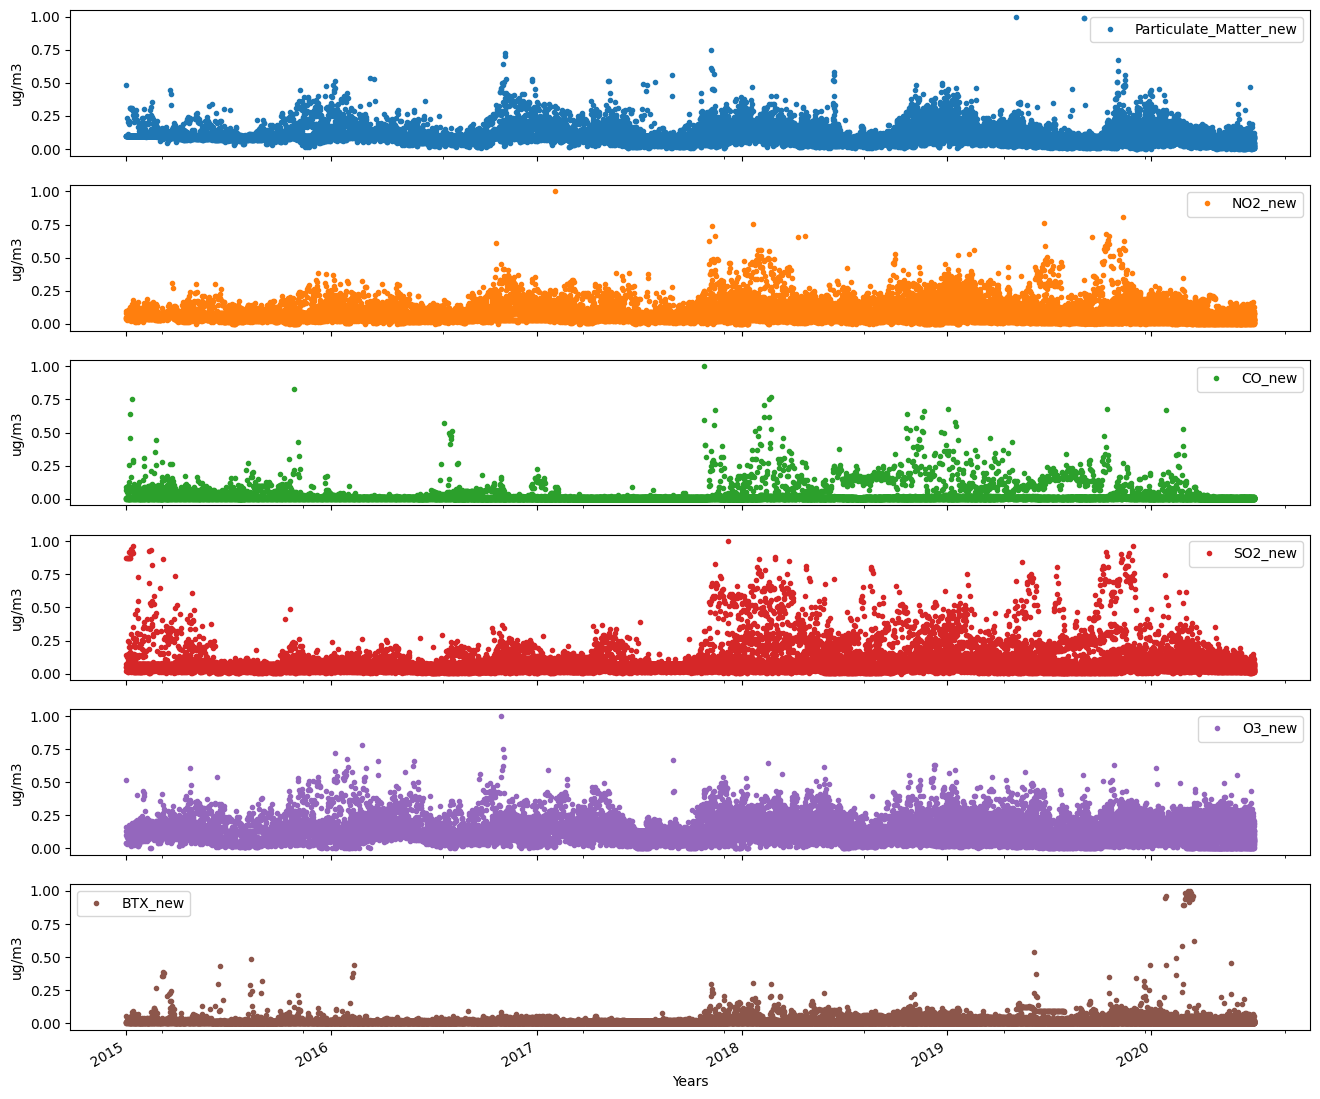

In [14]:
def visualisepollutants(udata, column):
    data = udata.copy()
    data.set_index('Date',inplace=True)

    axes = data[column].plot(marker='.',linestyle='None', figsize=(16, 15), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('ug/m3')
visualisepollutants(nCityData, pollutant)

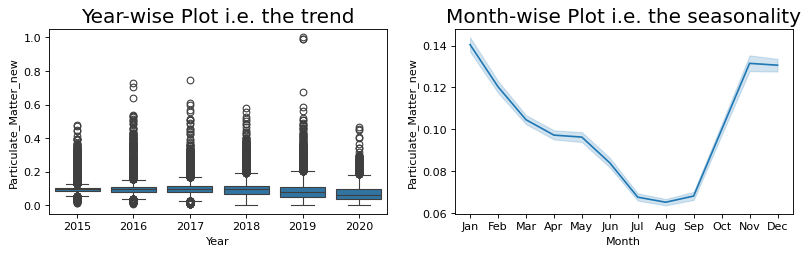

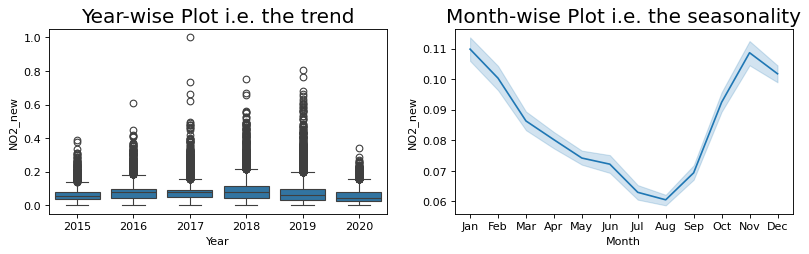

In [15]:
def trend_plot(nCityData, value):
    data = nCityData.copy()
    data['Year'] = [d.year for d in data.Date]
    data['Month'] = [d.strftime('%b') for d in data.Date]
    years = data['Year'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi= 80)
    sns.boxplot(x='Year', y=value, data=data, ax=axes[0])
    sns.lineplot(x='Month', y=value, data=data.loc[~data.Year.isin([2015, 2020]), :])

    axes[0].set_title('Year-wise Plot i.e. the trend', fontsize=18);
    axes[1].set_title('Month-wise Plot i.e. the seasonality', fontsize=18)
    plt.show()
value='Particulate_Matter_new'
trend_plot(nCityData,value)
value='NO2_new'
trend_plot(nCityData,value)

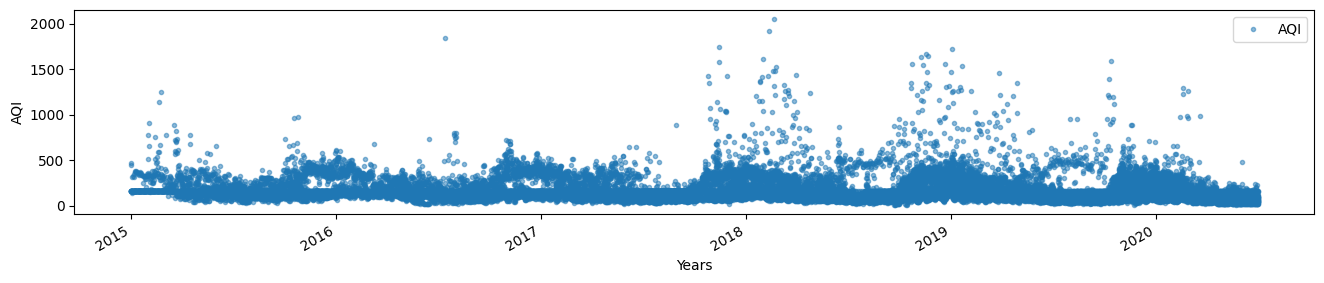

In [16]:
def visualiseAQI(udata, column):
    data = udata.copy()
    data.set_index('Date',inplace=True)

    axes = data[column].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 3), subplots=True)
    for ax in axes:
        ax.set_xlabel('Years')
        ax.set_ylabel('AQI')
visualiseAQI(nCityData, ['AQI'])

In [17]:
cities = ['Mumbai','Shillong','Lucknow','Delhi','Visakhapatnam','Patna','Bhopal']
somecityday = newCityData[newCityData['Date'] >= '2015-01-01']
AQI = somecityday[somecityday.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]

In [18]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')

Text(0, 0.5, 'AQI')

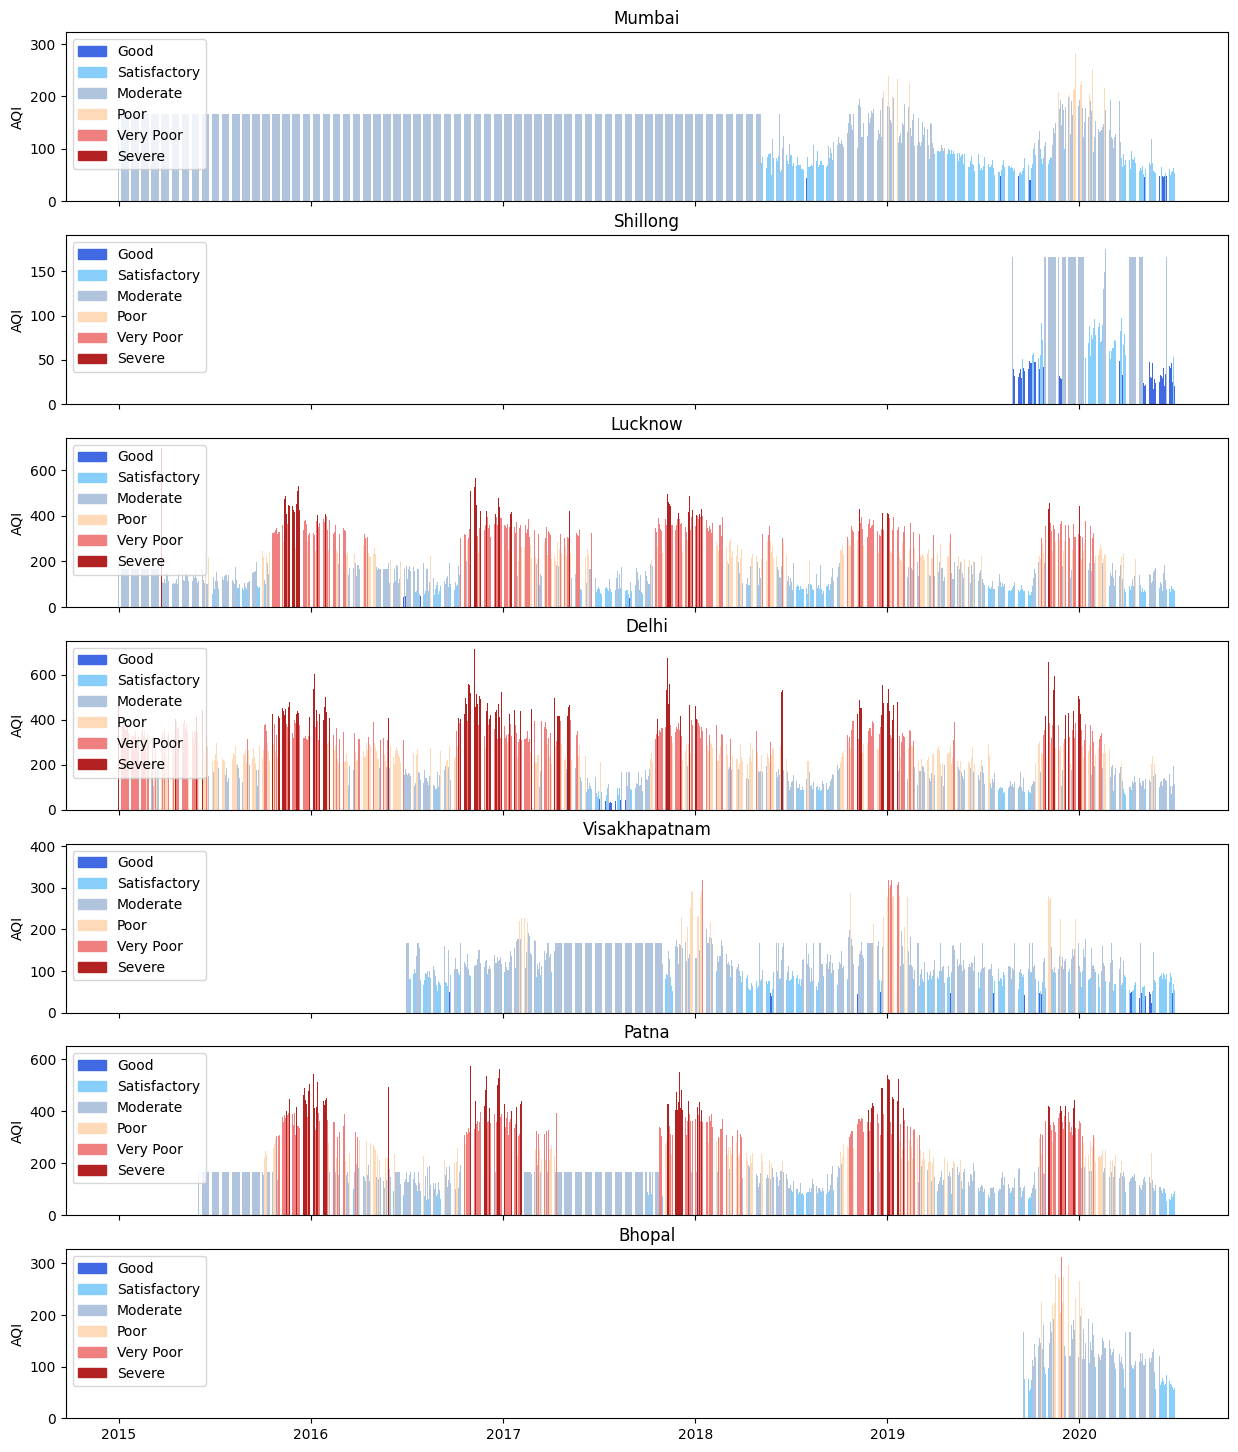

In [19]:
def getColorBar(city):
    col = []
    for val in AQI_pivot[city]:
        if val < 50:
            col.append('royalblue')
        elif val > 50 and val < 101:
            col.append('lightskyblue') #cornflowerblue
        elif val > 100 and val < 201:
            col.append('lightsteelblue')
        elif val > 200 and val < 301:
            col.append('peachpuff')
        elif val > 300 and val < 401:
            col.append('lightcoral')
        elif val> 400:
            col.append('firebrick')
        else:
            col.append('white')
    return col


ah = getColorBar('Mumbai')
de = getColorBar('Shillong')
mu = getColorBar('Lucknow')
ko = getColorBar('Delhi')
hy = getColorBar('Visakhapatnam')
ch = getColorBar('Patna')
bp=getColorBar('Bhopal')


colors = {'Good':'royalblue', 'Satisfactory':'lightskyblue', 'Moderate':'lightsteelblue', 'Poor':'peachpuff', 'Very Poor':'lightcoral', 'Severe':'firebrick'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

f, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7)) = plt.subplots(7, 1, sharex='col', sharey='row', figsize=(15,18))
ax1.bar(AQI_pivot.index, AQI_pivot['Mumbai'], color = ah, width = 0.75)
ax2.bar(AQI_pivot.index, AQI_pivot['Shillong'], color = de, width = 0.75)
ax3.bar(AQI_pivot.index, AQI_pivot['Lucknow'], color = mu, width = 0.75)
ax4.bar(AQI_pivot.index, AQI_pivot['Delhi'], color = ko, width = 0.75)
ax5.bar(AQI_pivot.index, AQI_pivot['Visakhapatnam'], color = hy, width = 0.75)
ax6.bar(AQI_pivot.index, AQI_pivot['Patna'], color = ch, width = 0.75)
ax7.bar(AQI_pivot.index, AQI_pivot['Bhopal'], color = bp, width = 0.75)

ax1.legend(handles, labels, loc='upper left')
ax2.legend(handles, labels, loc='upper left')
ax3.legend(handles, labels, loc='upper left')
ax4.legend(handles, labels, loc='upper left')
ax5.legend(handles, labels, loc='upper left')
ax6.legend(handles, labels, loc='upper left')
ax7.legend(handles, labels, loc='upper left')

ax1.title.set_text('Mumbai')
ax2.title.set_text('Shillong')
ax3.title.set_text('Lucknow')
ax4.title.set_text('Delhi')
ax5.title.set_text('Visakhapatnam')
ax6.title.set_text('Patna')
ax7.title.set_text('Bhopal')


ax1.set_ylabel('AQI')
ax2.set_ylabel('AQI')
ax3.set_ylabel('AQI')
ax4.set_ylabel('AQI')
ax5.set_ylabel('AQI')
ax6.set_ylabel('AQI')
ax7.set_ylabel('AQI')

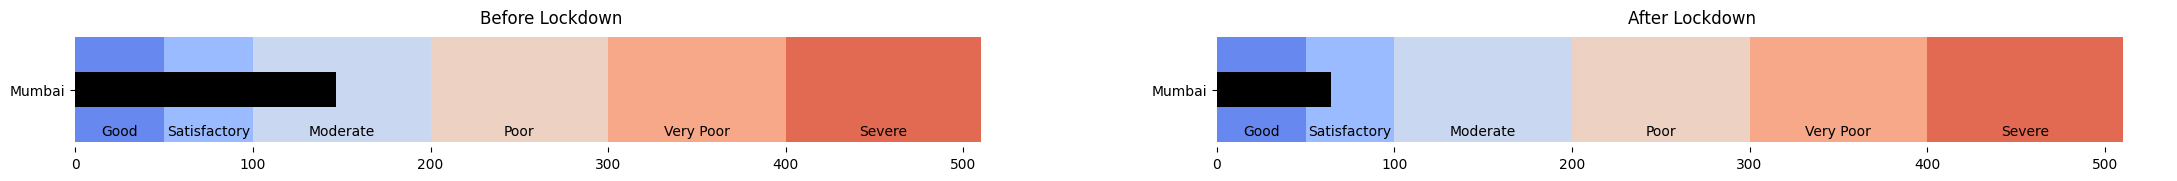

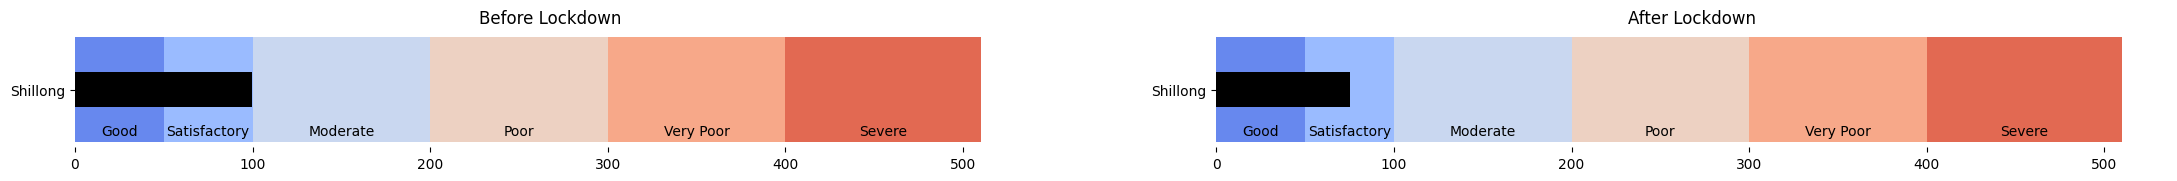

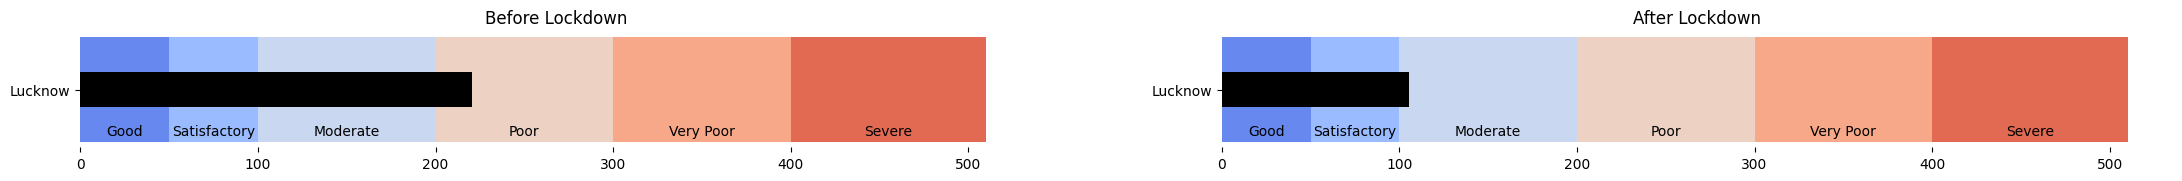

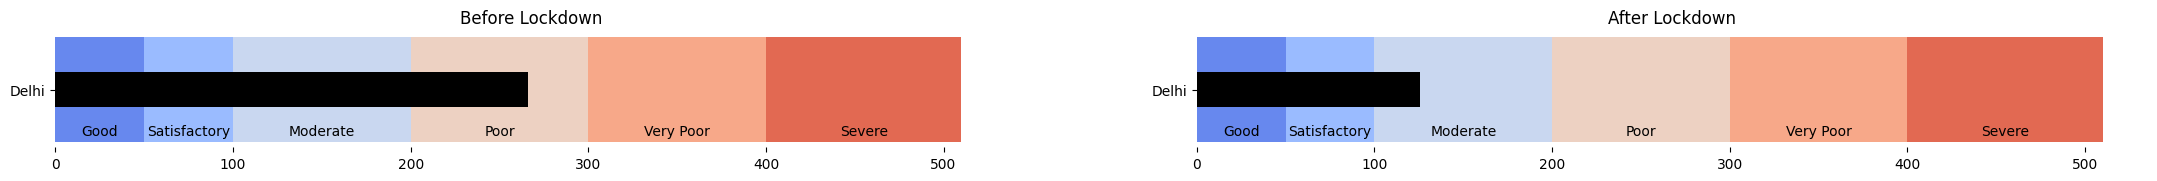

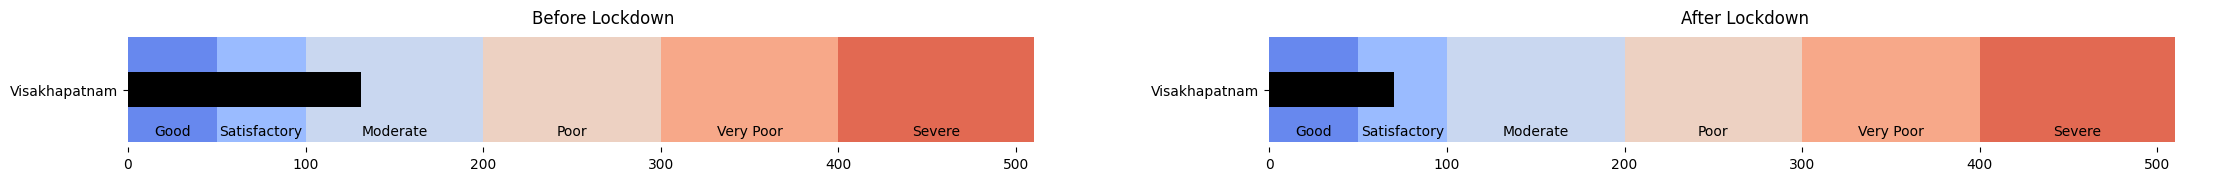

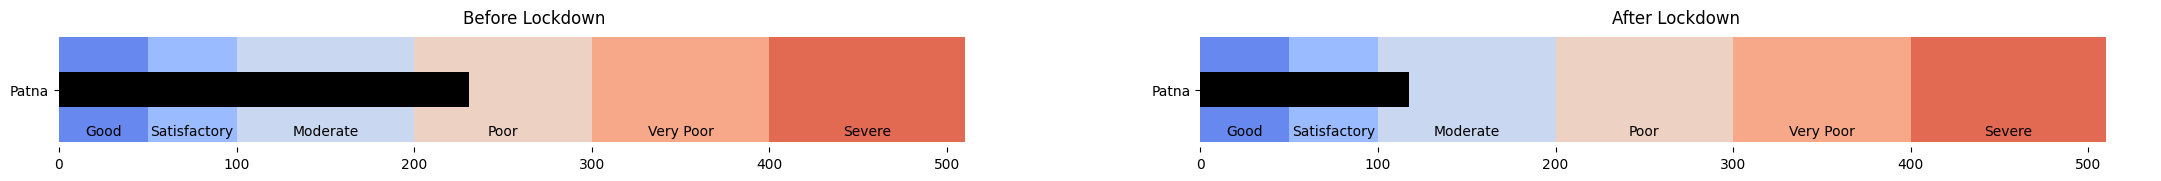

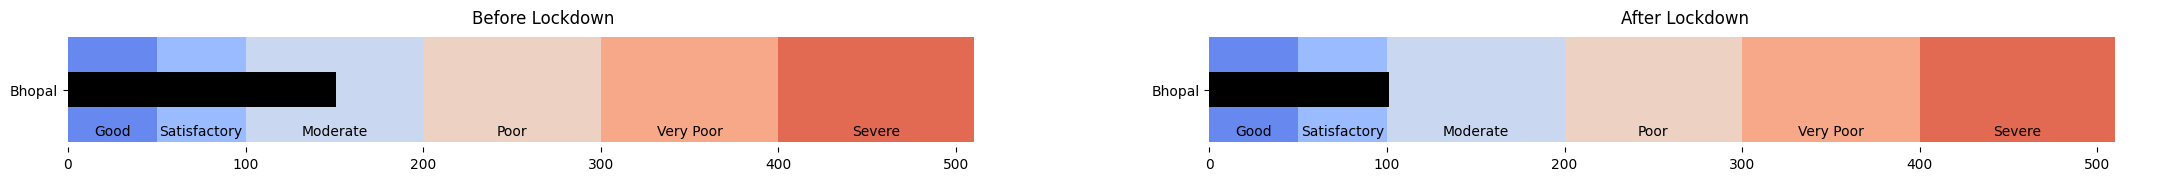

In [20]:
AQI_beforeLockdown = AQI_pivot['2015-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-07-01']
limits = [50, 100, 200, 300, 400, 510]
#palette = sns.light_palette("Spectral", len(limits), reverse = True)
palette = sns.color_palette("coolwarm", len(limits))
for city in cities:
    aqi_before = AQI_beforeLockdown[city].mean()
    aqi_after = AQI_afterLockdown[city].mean()
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(27, 1.5))
    ax1.set_yticks([1])
    ax1.set_yticklabels([city])
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax1.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax1.barh([1], aqi_before, color='black', height=5)

    # after lockdown
    ax2.set_yticks([1])
    ax2.set_yticklabels([city])
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    prev_limit = 0
    for idx, lim in enumerate(limits):
        ax2.barh([1], lim-prev_limit, left=prev_limit, height=15, color=palette[idx])
        prev_limit = lim

    ax2.barh([1], aqi_after, color='black', height=5)

    ax1.set_title('Before Lockdown')
    ax2.set_title('After Lockdown')

    rects = ax1.patches
    labels=["Good", "Satisfactory", "Moderate", "Poor", 'Very Poor', 'Severe']

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax1.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')
        ax2.text(
            rect.get_x() + rect.get_width() / 2,
            -height * .4,
            label,
            ha='center',
            va='bottom',
            color='black')

In [29]:
df=city_day
# df = df.iloc[:, 1:-3]
df


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,BTX,Particulate_Matter
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Moderate,0.02000,185.577681
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Moderate,12.95000,185.577681
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Moderate,25.45000,185.577681
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Moderate,15.57000,185.577681
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Moderate,28.68000,185.577681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good,15.04000,65.960000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory,3.33000,98.470000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory,0.02000,88.640000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory,0.00000,66.610000


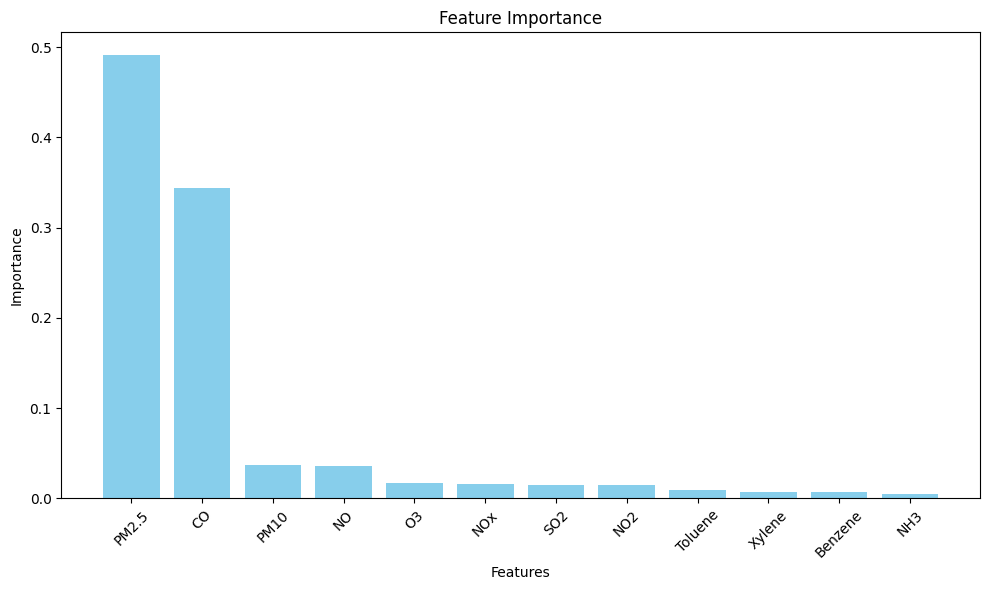

In [30]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is in a DataFrame named 'df'

# Features for analysis (excluding non-numeric or target columns)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Target variable for regression
target = 'AQI'  # Adjust if your target variable is different

# Extract features and target variable
X = df[features]
y = df[target]

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters

# Fit the model
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

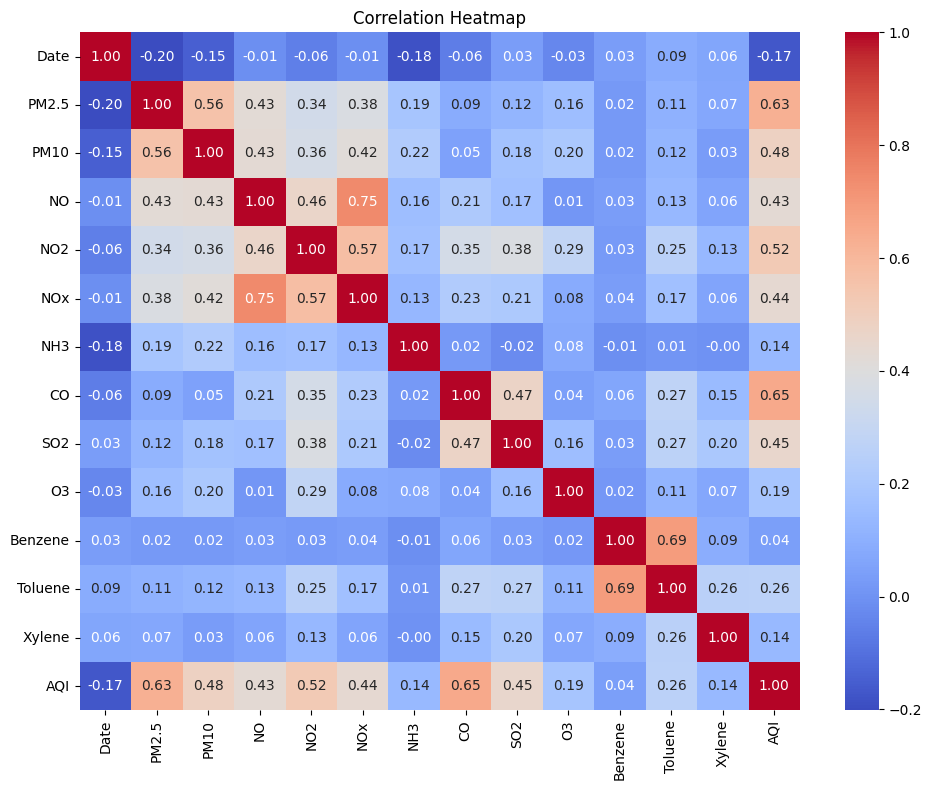

In [33]:
import seaborn as sns

# Calculate correlations
correlation_matrix = df.iloc[:,1:-3].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

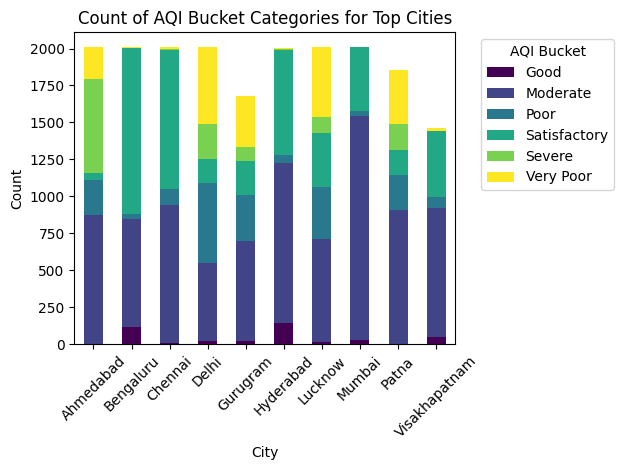

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming your dataset is in a DataFrame named 'df'

# Get the top N cities by count of AQI measurements
top_cities = df['City'].value_counts().nlargest(10).index.tolist()

# Filter the dataframe for top cities and group by 'City' and 'AQI_Bucket', calculating counts
filtered_data = df[df['City'].isin(top_cities)]
bucket_counts = filtered_data.groupby(['City', 'AQI_Bucket']).size().unstack().fillna(0)

# Plotting a stacked bar plot for top cities
plt.figure(figsize=(12, 8))
bucket_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of AQI Bucket Categories for Top Cities')
plt.legend(title='AQI Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Enter the city name: Delhi


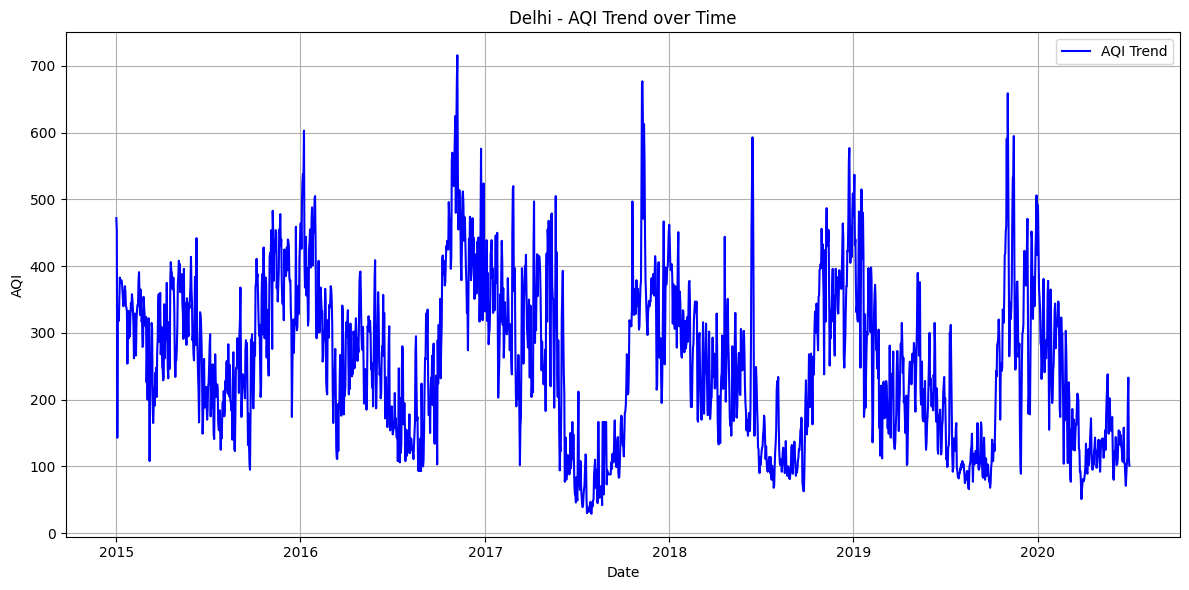

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is in a DataFrame named 'df'

# Function to plot the trend of AQI values for a given city
def plot_aqi_trend(city_name):
    city_data = df[df['City'] == city_name][['Date', 'AQI']]
    city_data['Date'] = pd.to_datetime(city_data['Date'])  # Ensure 'Date' column is in datetime format
    city_data.set_index('Date', inplace=True)

    # Plotting the trend of AQI values
    plt.figure(figsize=(12, 6))
    plt.plot(city_data.index, city_data['AQI'], label='AQI Trend', color='blue')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title(f'{city_name} - AQI Trend over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
user_input_city = input("Enter the city name: ")
plot_aqi_trend(user_input_city)

In [67]:
dfnew=city_day

In [68]:
models = dict()

Train Score : 79.13%
Test Score : 80.47%
Root Mean Squared Error: 54.252946838701995
Predicted Future AQI: [114.83433903]


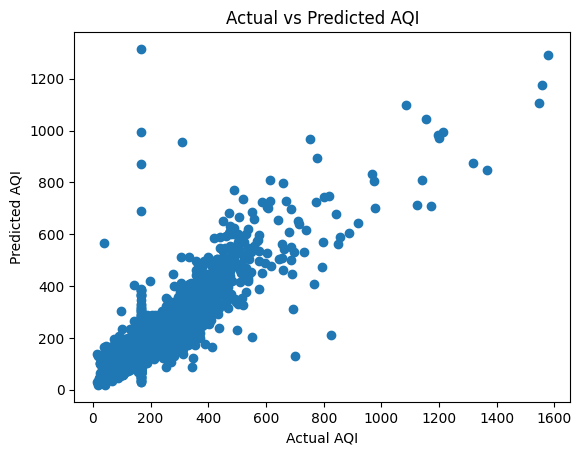

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'dfnew' contains your data
# Splitting data into features and target variable
X = dfnew[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = dfnew['AQI']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate Model
train_score_1 = str(model.score(X_train, y_train) * 100)
test_score_1 = str(model.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_1[:5]}%\nTest Score : {test_score_1[:5]}%')
models["Linear"] = test_score_1

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the root mean squared error (RMSE) as a performance metric
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# Prepare future data for prediction
# Replace the values with your future data
future_data = pd.DataFrame({
    'PM2.5': [50],
    'PM10': [70],
    'NO': [1.5],
    'NO2': [20],
    'NOx': [25],
    'NH3': [3],
    'CO': [0.8],
    'SO2': [5],
    'O3': [45],
    'Benzene': [4],
    'Toluene': [8],
    'Xylene': [1.5]
})
# Predict future AQI
future_aqi = model.predict(future_data)
print(f"Predicted Future AQI: {future_aqi}")

# Visualization: Actual vs Predicted AQI
plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

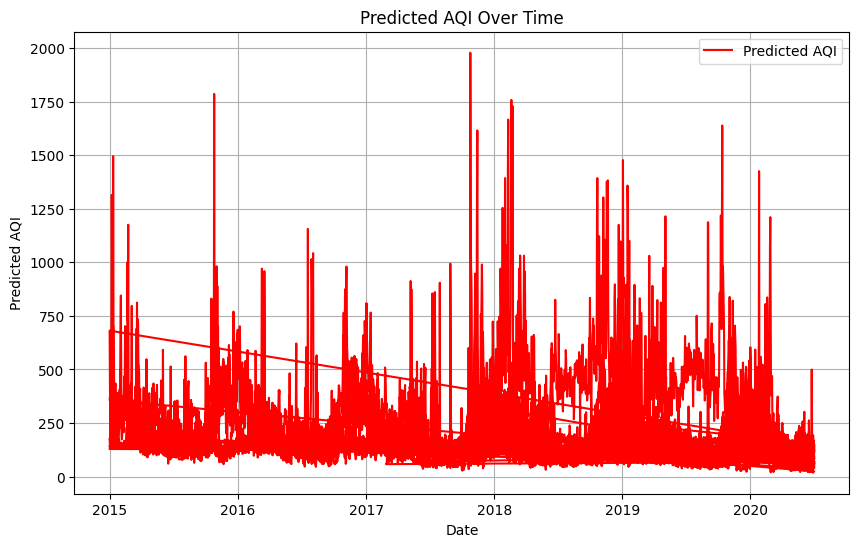

In [70]:
import matplotlib.pyplot as plt

# Assuming 'Date' column is already converted to datetime format

# Predicting AQI values for the entire dataset


dfnew['Predicted_AQI'] = model.predict(dfnew[features])

# Plotting the predicted AQI values over time
plt.figure(figsize=(10, 6))
plt.plot(dfnew['Date'], dfnew['Predicted_AQI'], label='Predicted AQI', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted AQI')
plt.title('Predicted AQI Over Time')
plt.legend()
plt.grid(True)
plt.show()

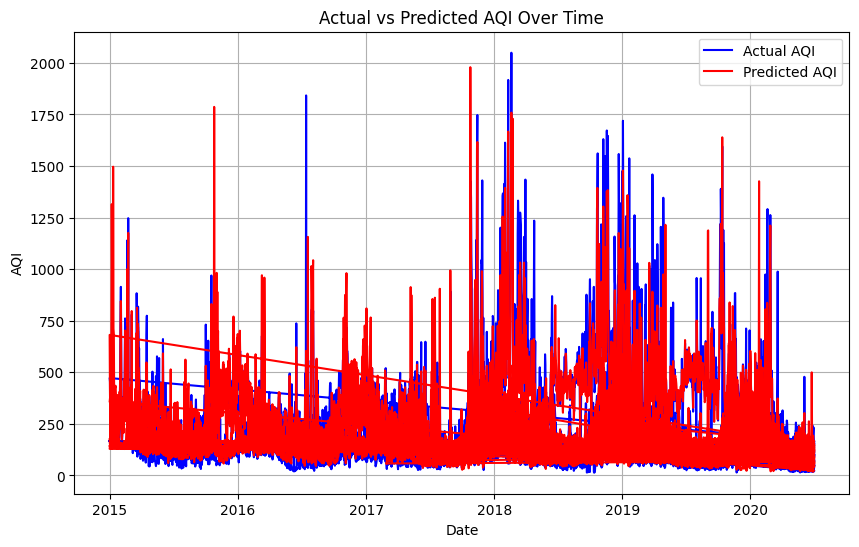

In [71]:
import matplotlib.pyplot as plt

# Assuming 'Date' column is already converted to datetime format

# Predicting AQI values for the entire dataset
dfnew['Predicted_AQI'] = model.predict(dfnew[features])

# Plotting actual vs predicted AQI values
plt.figure(figsize=(10, 6))

# Plotting actual AQI values
plt.plot(dfnew['Date'], dfnew['AQI'], label='Actual AQI', color='blue')

# Plotting predicted AQI values
plt.plot(dfnew['Date'], dfnew['Predicted_AQI'], label='Predicted AQI', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI Over Time')
plt.legend()
plt.grid(True)
plt.show()

Train Score : 89.99%
Test Score : 87.33%
Root Mean Squared Error (RMSE): 43.69029720709349


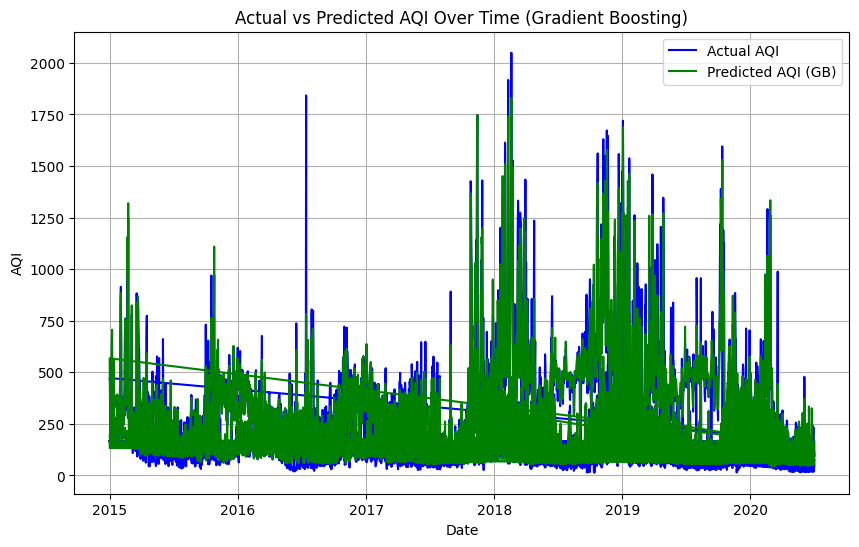

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'Date' column is already converted to datetime format
# Features used for prediction (you can adjust this according to your data)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dfnew[features], dfnew['AQI'], test_size=0.2, random_state=42)

# Initializing Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Training the model
model.fit(X_train, y_train)

# Evaluate Model
train_score_2 = str(model.score(X_train, y_train) * 100)
test_score_2 = str(model.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_2[:5]}%\nTest Score : {test_score_2[:5]}%')
models["Gradient_boosting"] = test_score_2

# Predicting AQI values for the test set
predicted_AQI = model.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, predicted_AQI, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Predicting AQI values for the entire dataset
dfnew['Predicted_AQI_GB'] = model.predict(dfnew[features])

# Plotting actual vs predicted AQI values
plt.figure(figsize=(10, 6))

# Plotting actual AQI values
plt.plot(dfnew['Date'], dfnew['AQI'], label='Actual AQI', color='blue')

# Plotting predicted AQI values using Gradient Boosting
plt.plot(dfnew['Date'], dfnew['Predicted_AQI_GB'], label='Predicted AQI (GB)', color='green')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI Over Time (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.show()

Train Score : 98.60%
Test Score : 87.11%
Root Mean Squared Error (RMSE): 44.077008052484985


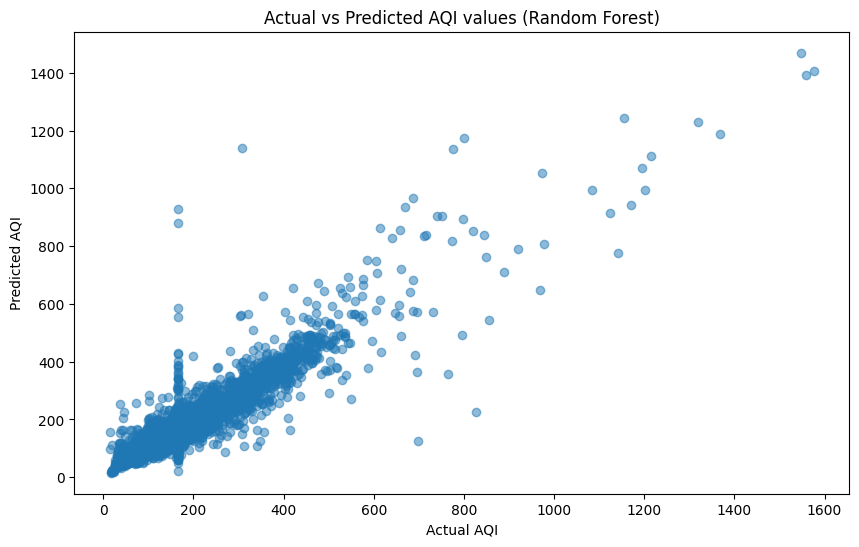

In [73]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming dfnew is the DataFrame with the AQI data

# Prepare features and target variable
features = dfnew.drop(columns=['City', 'Date', 'AQI', 'AQI_Bucket'])  # Exclude non-numeric and target columns
target = dfnew['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Model
train_score_3 = str(rf_model.score(X_train, y_train) * 100)
test_score_3 = str(rf_model.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_3[:5]}%\nTest Score : {test_score_3[:5]}%')
models["Random_Forest"] = test_score_3

# Predict AQI values
predictions = rf_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI values (Random Forest)')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming dfnew is the DataFrame with the AQI data

# Prepare features and target variable
features = dfnew.drop(columns=['City', 'Date', 'AQI', 'AQI_Bucket'])  # Exclude non-numeric and target columns
target = dfnew['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_rf_model = grid_search.best_estimator_

# Evaluate Model
train_score = str(best_rf_model.score(X_train, y_train) * 100)
test_score = str(best_rf_model.score(X_test, y_test) * 100)
print(f'Train Score : {train_score[:5]}%\nTest Score : {test_score[:5]}%')
models["Random_Forest"] = test_score

# Predict AQI values
predictions = best_rf_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI values (Random Forest)')
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
# Assuming 'y_test' contains actual AQI values and 'predictions' contains predicted AQI values from the Random Forest model

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual AQI', color='blue')
plt.plot(predictions, label='Predicted AQI', color='red', alpha=0.7)
plt.xlabel('Data Points')
plt.ylabel('AQI Values')
plt.title('Comparison of Actual vs Predicted AQI values (Random Forest)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'dfnew' contains your data
# Splitting data into features and target variable
features = dfnew[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
target = dfnew['AQI']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on training and testing set
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predictions on training and testing set
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on training and testing set
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate RMSE for each model
rmse_linear_train = mean_squared_error(y_train, y_train_pred_linear, squared=False)
rmse_linear_test = mean_squared_error(y_test, y_test_pred_linear, squared=False)

rmse_gb_train = mean_squared_error(y_train, y_train_pred_gb, squared=False)
rmse_gb_test = mean_squared_error(y_test, y_test_pred_gb, squared=False)

rmse_rf_train = mean_squared_error(y_train, y_train_pred_rf, squared=False)
rmse_rf_test = mean_squared_error(y_test, y_test_pred_rf, squared=False)

# Plotting the results
models = ['Linear Regression', 'Gradient Boosting', 'Random Forest']
train_rmse = [rmse_linear_train, rmse_gb_train, rmse_rf_train]
test_rmse = [rmse_linear_test, rmse_gb_test, rmse_rf_test]

plt.figure(figsize=(10, 6))

plt.bar(models, train_rmse, color='blue', alpha=0.7, label='Train RMSE')
plt.bar(models, test_rmse, color='red', alpha=0.7, label='Test RMSE', hatch='//')  # Using hatch for better visibility

plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Train and Test RMSE for Different Models')
plt.legend()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Assuming 'models' is a dictionary with model names as keys and accuracy as values
# model_names = list(models.keys())
# accuracy = list(models.values())

# # Convert accuracy values to float if they are not already
# accuracy = [float(acc) for acc in accuracy]

# # creating the bar plot
# plt.bar(model_names, accuracy)
# plt.xlabel('Model')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy')
# # plt.show
